Taller 2

In [17]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate
import pandas as pd
from matplotlib import rc
import os.path as path
import os
from scipy.special.orthogonal import roots_laguerre

Derivación

8

a)

Dado que el polinomio interpolador de Lagrange es de la forma:

$p_{n}(x)=\sum_{i=0}^{n}f(x_{j})L_{i}(x)$

con $L_{i}(x)=\prod_{j=0,j\neq i}\frac{x-x_{j}}{x_{i}-x_{j}}$

Entonces, para el conjunto $\varOmega=\left\lbrace(x_{0},f(x_{0})),(x_{1},f(x_{1})),(x_{2},f(x_{2})))\right\rbrace$ el polinomio interpolador es:


$p(x)= f(x_{0})(\frac{x-x_{1}}{x_{0}-x_{1}}*\frac{x-x_{2}}{x_{0}-x_{2}}) + f(x_{1})(\frac{x-x_{0}}{x_{1}-x_{0}}*\frac{x-x_{2}}{x_{1}-x_{2}}) + f(x_{2})(\frac{x-x_{0}}{x_{2}-x_{0}}*\frac{x-x_{1}}{x_{2}-x_{1}})$
    

b)

In [18]:
x=sym.Symbol('x',real=True)

h=sym.Symbol('h',real=True)

X=[0*h,1*h,2*h]

In [19]:
def Lagrange(x,xi,j):
    
    prod = 1
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [20]:
def GetCoefficients(x,p,X):
    coefficients=[]
    
    for i in range(len(X)):
        Li=Lagrange(x,X,i)
        
        dLi=sym.diff(Li,x,1)
        
        C=dLi.subs(x,X[p])
        
        coefficients.append(C)
        
    return coefficients

In [21]:
coef=GetCoefficients(x,0,X)
coef

[-3/(2*h), 2/h, -1/(2*h)]

Usando los coeficientes hallados previamente, tenemos que:

$ f'(x_{0})= \frac{-3}{2h}f(x_{0}) + \frac{2}{h} f(x_{1}) - \frac{1}{2h} f(x_{2})$

La cual simplificada queda de la forma:

$ f'(x_{0})=\frac{1}{2h}\left( -3f(x_{0}) + 4f(x_{1}) - f(x_{2})\right)$

c)

In [23]:
rango= np.linspace(0.1,1.1,100)
h=0.01

def derivada_progresiva(f,x,h):
    df=[]
    for i in range(len(x)):
        derivada= 1/(2*h)*(-3*f(x[i])+4*f(x[i]+h)-f(x[i]+(2*h)))
        df.append(derivada)
    return df

d)

In [24]:
def derivada_central(f,x,h):
    d = 0.   
    if h != 0:
        derivada = (f(x+h) - f(x-h))/(2*h)
    
    return derivada

e)

In [25]:
def derivada_analitica(x):
    sec= (1/np.cos(x))**2
    raiz= (np.tan(x))**(1/2)
    resp= sec/(2*raiz)
    
    return resp

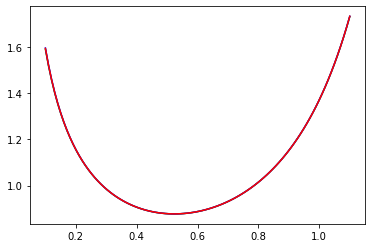

In [26]:
tan = lambda x: np.sqrt(np.tan(x))
progresiva= derivada_progresiva(tan,rango,h)
central= derivada_central (tan,rango,h)

analitica= derivada_analitica(rango)

plt.plot(rango,progresiva, "g")
plt.plot (rango, central,"b")
plt.plot (rango, analitica, "r")

f)

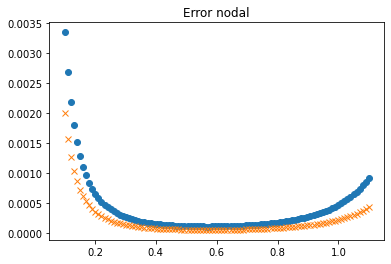

In [27]:
rango= np.linspace(0.1,1.1,100)

progresiva= derivada_progresiva(tan,rango,h)
central= derivada_central (tan,rango,h)
analitica= derivada_analitica(rango)

error_progresiva = np.abs(analitica-progresiva)
error_central=np.abs(analitica- central)

plt.plot(rango, error_progresiva, 'o')
plt.plot(rango, error_central,'x')
plt.title('Error nodal')
plt.show()
#Si son del mismo orden de precision 



Raíces de Polinomios

5

In [28]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)
n = 19



In [29]:
def GetLaguerre(n,x):
    
    y= ((np.e)**(-x))*(x**n)
    
    poly = ((np.e**x)*sym.diff( y,x,n ))/(np.math.factorial(n))
    
    return poly

In [30]:
a = sym.Symbol("a")
GetLaguerre(10,a)

2.75573192239859e-7*a**10 - 2.75573192239859e-5*a**9 + 0.00111607142857143*a**8 - 0.0238095238095238*a**7 + 0.291666666666667*a**6 - 2.1*a**5 + 8.75*a**4 - 20.0*a**3 + 22.5*a**2 - 10.0*a + 1

In [31]:
Laguerre = []
DLaguerre = []
x = sym.Symbol("x")
for i in range(0, n+1):
    Poly = GetLaguerre(i,x)
    Laguerre.append(Poly)
    DLaguerre.append( sym.diff(Poly,x) )

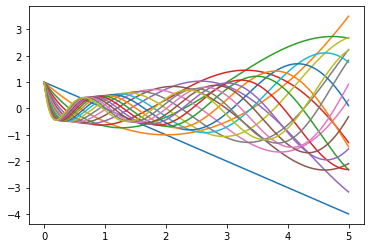

In [34]:
_x=np.linspace(0,5,1000)

for i, p in enumerate(Laguerre):
    if i!= 0:
        pn = sym.lambdify([x],p,'numpy')
        plt.plot(_x,pn(_x))

In [35]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

In [36]:
def GetRoots(f,df,x,tolerancia = 14):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)
        
        if root != False:
            
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [37]:
def GetAllRoots(n,xn,Laguerre,DLaguerre):
    
    poly = sym.lambdify([x],Laguerre[n],'numpy')
    Dpoly = sym.lambdify([x],DLaguerre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)
    
    return Roots

In [38]:
root_=[]
conteo=0

while conteo<19:
    xn = np.linspace(0,10,20)
    n=conteo+1
    Roots = GetAllRoots(n,xn,Laguerre,DLaguerre)
    root_.append(Roots)
    
    conteo+=1
    
root_
    

[array([1.]),
 array([0.58578644, 3.41421356]),
 array([0.41577456, 2.29428036, 6.28994508]),
 array([0.32254769, 1.7457611 , 4.5366203 , 9.39507091, 9.39507091]),
 array([ 0.26356032,  1.41340306,  3.59642577,  3.59642577,  7.08581001,
         7.08581001,  7.08581001, 12.64080084]),
 array([ 0.2228466 ,  1.1889321 ,  2.99273633,  2.99273633,  5.77514357,
         5.77514357,  5.77514357,  5.77514357,  9.83746742,  9.83746742,
        15.98287398]),
 array([0.19304368, 1.0266649 , 2.56787674, 2.56787674, 4.90035308,
        4.90035308, 4.90035308, 8.18215344, 8.18215344, 8.18215344]),
 array([ 0.17027963,  0.90370178,  2.25108663,  2.25108663,  4.26670017,
         4.26670017,  4.26670017,  4.26670017,  7.0459054 ,  7.0459054 ,
         7.0459054 ,  7.0459054 , 10.75851601, 22.86313174]),
 array([0.15232223, 0.80722002, 2.00513516, 2.00513516, 3.78347397,
        3.78347397, 3.78347397, 3.78347397, 6.20495678]),
 array([0.13779347, 0.72945455, 1.8083429 , 3.4014337 , 5.55249614,
     

Lagrange

1

Sean $C_{0},C_{1},...,C_{n-1}$ los coeficientes del polinomio interpolador $p(x_{i})$ de modo que,
$p(x_{i})=C_{0}+C_{1}x_{i},C_{2}x_{i}^2+...+C_{n-1}x_{i}^{n-1}$ 

Entonces, se puede reescribir en su forma matricial como:

$$\begin{Bmatrix}
1 & + & x_{0} & + & x_{0}^2 & + & \cdots & + & x_{0}^n & = & y_{1}\\
1 & + & x_{1} & + & x_{1}^2 & + & \cdots & + & x_{1}^n & = & y_{1}\\
 \vdots & \vdots  &  \vdots & \vdots  &  \vdots & \vdots & \vdots & \vdots  & \vdots & \vdots  & \vdots  \\
1 & + & x_{n} & + & x_{n}^2 &  + & \cdots & + & x_{n}^n & = & y_{1}
\end{Bmatrix}$$


Obteniendo un sistema de ecuaciones lineales, de la forma:

$$\begin{pmatrix}
1 & x_{0} & x_{0}^2 & \cdots & x_{0}^n\\
1 & x_{1} & x_{1}^2 & \cdots & x_{1}^n\\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n} & x_{n}^2 & \cdots & x_{n}^n
\end{pmatrix}
\begin{pmatrix}
C_{0} \\
C_{1} \\
\vdots \\
C_{n}
\end{pmatrix}
=
\begin{pmatrix}
f(x_{0}) \\
f(x_{1}) \\
\vdots \\
f(x_{n})
\end{pmatrix}$$


De modo que el determinante de esta matrix cumple con la ecuación:

$\prod_{0\leqq i<j\leqq n}(x_{j}-x_{i})$

Este da distinto de cero si para todo $i,j$ , $x_{i}\neq x_{j}$

Esto implica que el sistema tiene una única solución y por ende el polinomio interpolador generado por la Interpolación de Lagrange es único.


4

In [39]:
def cargar(nombre:str)->tuple:
    archivo=open(nombre,mode='r',encoding=("utf8"))
    llaves=archivo.readline().strip()
    linea=archivo.readline().strip()
    y=[]
    x=[]
    
    while len(linea)>0:
        datos=linea.split(",")
        datos[0]
        x.append(float(datos[0]))
        y.append(float(datos[1]))
          
        linea=archivo.readline()
        
    archivo.close()

    return  (x,y)

In [40]:
X,Y=cargar('Parabolico.txt')
X,Y

([1.4, 3.5, 5.6], [0.4007954931819738, 0.594128102489774, 0.29802795523938164])

In [41]:
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [42]:
def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

In [43]:
x = np.linspace(X[0],X[-1],100)
y = Interpolate(x,X,Y)

In [44]:
x_symb = sym.Symbol('x',real=True)

f=Interpolate(x_symb,X,Y)
f_sym = sym.simplify(f)
f_sym

x*(0.363970234266202 - 0.0554912422401579*x)

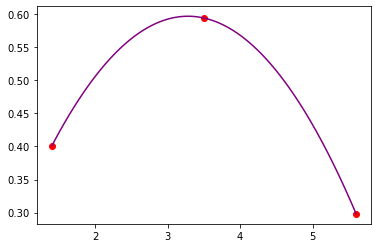

In [45]:
plt.scatter(X,Y,marker='o',color='red')
plt.plot(x,y,color='purple')


In [46]:
def function(x):
    return x*0.363970234266202 -0.0554912422401579*(x**2)


In [47]:
def Angle():
    theta=np.arctan(0.363970234266202)
    
    return theta

ang=Angle()*360/(2*np.pi)
ang

19.999999999999986

In [48]:
def GetSpeed(Theta,g=9.8):
    vel=(g/(2*0.0554912422401579*((np.cos(Angle()))**2)))**(1/2)
    return vel

speed=GetSpeed(ang)
speed
    

10.0

5

In [49]:
X_,Y_=cargar('Newton-Gregory.txt')
X_,Y_

([0.0, 1.5, 2.0, 3.8, 4.2, 5.9], [-18.0, -13.0, 0.0, 5.0, 3.0, 10.0])

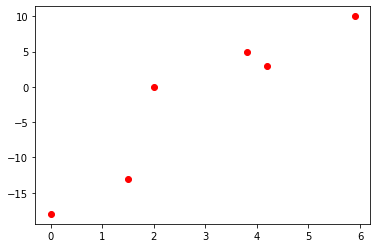

In [50]:
plt.scatter(X_,Y_,color='r',marker='o')

In [51]:
def newton_interpolation(X_param, Y_param, x):
       
    Diff = np.zeros((len(X_param),len(X_param)))
    Diff[:,0] = Y_param
    for i in range(1, len(X_param)):
        for j in range(i, len(X_param)):
            Diff[j,i] = (Diff[j,i-1] - Diff[j-1,i-1]) / (X_param[j] - X_param[j-i])

    y_new = np.zeros_like(x)
    for j, x_val in enumerate(x):
        p = 0
        for i in range(len(X_param)):
            term = Diff[i,i]
            for k in range(i):
                term *= (x_val - X_param[k])
            p += term
        y_new[j] = p

    return y_new

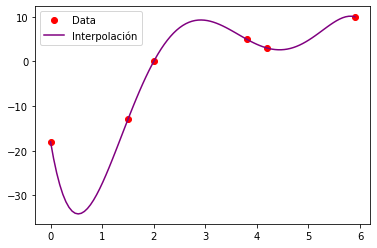

In [52]:
xt = np.linspace(X_[0],X_[-1],100)

yt = newton_interpolation(X_,Y_,xt)

plt.plot(X_, Y_, 'o',color="red", label='Data')
plt.plot(xt, yt,color="purple", label='Interpolación')
plt.legend()
plt.show()

Integración 

1

Teniendo en cuenta la fórmula 3.85 para la integración por el método del trapecio simple, dada por:


$I= \int_{a}^{b}\! f(x) dx \cong \int_{a}^{b}\! p_{1}(x) dx = \frac{b-a}{2} * (f(a)+f(b))$

Sus respectivos pasos intermedios son:

$ \int_{a}^{b}\! f(x) dx \cong \int_{a}^{b}\! p_{1}(x) dx $\
\
$= \int_{a}^{b}\! (\frac{x-b}{a-b}*f(a) + \frac{x-a}{b-a}*f(b)) dx $\
\
$= \int_{a}^{b}\! (\frac{x-b}{a-b}*f(a)) dx + \int_{a}^{b}\! (\frac{x-a}{b-a}*f(b)) dx$\
\
$=f(a)*(\frac{x^2}{2(a-b)}-\frac{xb}{a-b})|_{a}^{b} + f(b)*(\frac{x^2}{2(b-a)}-\frac{xa}{b-a})|_{a}^{b}$\
\
$=f(a)*(\frac{b^2}{2(a-b)}-\frac{b^2}{a-b}-\frac{a^2}{2(a-b)}+\frac{ab}{a-b}) + f(b)*(\frac{-b^2}{2(a-b)}+\frac{ba}{a-b}+\frac{a^2}{2(a-b)}-\frac{a^2}{a-b})$\
\
$=f(a)*(\frac{-b^2}{2(a-b)}-\frac{a^2}{2(a-b)}+\frac{ab}{a-b}) + f(b)*)*(\frac{-b^2}{2(a-b)}-\frac{a^2}{2(a-b)}+\frac{ab}{a-b})$\
\
$= (\frac{-b^2}{2(a-b)}-\frac{a^2}{2(a-b)}+\frac{ab}{a-b})*(f(a)+f(b))$\
\
$= -(\frac{b^2 - 2ba + a^2}{2(a-b)})*(f(a)+f(b))$\
\
$= \frac{(b-a)^2}{2(b-a)}*(f(a)+f(b))$\
\
$=\frac{b-a}{2}*(f(a)+f(b))$

3

Teniendo en cuanta la fórmula 3.98, el método de Simpson simple está dado por:

$I= \int_{a}^{b}\! f(x) dx \cong \int_{a}^{b}\! p_{2}(x) dx = \frac{h}{3} * (f(a)+4f(x_{m})+f(b))$

y dado que $x_{m}=\frac{a+b}{2}$

Sus respectivos pasos intermedios son:

$I= \int_{a}^{b}\! \frac{(x-b)(x-x_{m})}{(a-b)(a-x_{m})}f(a) + \frac{(x-a)(x-b)}{(x_{m}-a)(x_{m}-b)}f(x_{m}) +\frac{(x-a)(x-x_{m})}{(b-a)(b-x_{m})}f(b)dx $\
\
$= \int_{a}^{b}\! \frac{(x-b)(\frac{2x-a-b}{2})}{(a-b)(\frac{2a-a-b}{2})}f(a) dx + \int_{a}^{b}\! \frac{(x-a)(x-b)}{(\frac{a+b-2a}{2})(\frac{a+b-2b}{b})}f(x_{m}) dx + \int_{a}^{b}\! \frac{(x-a)(\frac{2x-a-b}{2})}{(b-a)(\frac{2b-a-b}{2})}f(b) dx$\
\
$=\int_{a}^{b}\! \frac{2x^2 -ax-3bx+ab+b^2}{(a-b)^2}f(a) dx + (-4) \int_{a}^{b}\! \frac{x^2 -xb-xa+ab}{(a-b)^2}f(x_{m}) dx + \int_{a}^{b}\!\frac{2x^2 -3xa-xb+ab+a^2}{(b-a)^2}f(b) dx$\
\
$=\frac{f(a)}{(a-b)^2} (\frac{4x^3 -3ax^2 -9bx^2 +6abx +6xb^2}{6})|_{a}^{b} + \frac{-4*f(x_{m})}{(a-b)^2} (\frac{2x^3 -3bx^2 -3ax^2 +6abx }{6})|_{a}^{b} + \frac{f(b)}{(a-b)^2} (\frac{4x^3 -9ax^2 -3bx^2 +6abx +6xa^2}{6})|_{a}^{b}$ \
\
$=\frac{f(a)}{(a-b)^2} (\frac{4b^3 -3ab^2 -9b^3 +6ab^2 +6b^3 -4a^3 +3a^3 +9ba^2 -6ba^2 -6ab^2}{6}) + \frac{-4*f(x_{m})}{(a-b)^2} (\frac{2b^3 -3b^3 -3ab^2 +6ab^2 -2a^3 +3ba^2 +3a^3 -6ba^2}{6}) + \frac{f(b)}{(a-b)^2} (\frac{4b^3 -9ab^2 -3b^3 +6ab^2 +6ba^2 -4a^3 +9a^3 +3ba^2 -6ba^2 -6a^3}{6})$\
\
$=\frac{f(a)}{(a-b)^2}(\frac{b^3 -3ab^2 +3ba^2 -a^3 }{6}) + \frac{4*f(x_{m})}{(a-b)^2}(\frac{b^3 -3ab^2 +3ba^2 -a^3 }{6}) + \frac{f(b)}{(a-b)^2}(\frac{b^3 -3ab^2 +3ba^2 -a^3 }{6})$\
\
$=\frac{b^3 -3ab^2 +3ba^2 -a^3 }{6((a-b)^2)}(f(a)+4*f(x_{m})+f(b))$\
\
$=\frac{(b-a)^3}{6((b-a)^2)}(f(a)+4*f(x_{m})+f(b))$\
\
$=\frac{b-a}{6}(f(a)+4*f(x_{m})+f(b))$\
\
Si $h=\frac{b-a}{2}$, entonces:

$I=\frac{h}{3}(f(a)+4*f(x_{m})+f(b))$


7

In [53]:
n = 200
x = np.linspace(-1,1,n+1)
y = np.linspace(-1,1,n+1)

a = 0.
b = x[-1]

R = 1

In [54]:
def f(x,y,R=1.):
    
    z = R**2 - x**2 - y**2
    
    if z <= 0.:
        return 0.
    else:
        return np.sqrt(z)

In [55]:
f = np.vectorize(f)

In [56]:
X_e,Y_e = np.meshgrid(x,y)
Z = f(X_e,Y_e)
Z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

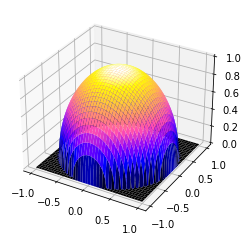

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X_e,Y_e,Z,cmap='gnuplot2')

In [58]:
x = np.linspace(-1,1,n+1)
y = np.linspace(-1,1,n+1)
volumen=0
area=(x[1]-x[0])*(y[1]-y[0])

for i in range(len(x)):
    for j in range(len(y)):
        
        p_inicial=f(x[i],y[j])
        p_v1=f(x[i-1],y[j])
        p_v2=f(x[i-1],y[j-1])
        p_v3=f(x[i],y[j-1])
        
        if p_inicial in Z and p_v1 in Z and p_v2 in Z and p_v3 in Z:
            promedio=(p_inicial+p_v1+p_v2+p_v3)/4
            vol_i=promedio*area
            volumen+=vol_i
            
print(volumen)

2.0943195841075304


14

In [59]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)
n = 2

In [60]:
def function(x):
    func=3+5*x+x**2
    return func


In [61]:
roots_, weights_ = np.polynomial.legendre.leggauss(n+1)

coefficients = []

for i in range(n+1):
    c_i = ((2*i+1)/2) * sum(weights_[j] * function(roots_[j]) * np.polynomial.legendre.Legendre.basis(i)(roots_[j]) for j in range(n+1))
    coefficients.append(c_i)

polinomio = np.polynomial.legendre.Legendre(coefficients)
polinomio

Legendre([3.33333333, 5.        , 0.66666667], domain=[-1,  1], window=[-1,  1])

17

In [62]:
x_=sym.Symbol('x',real=True)
def funcion(x):

    func=(x**3)/((np.e**(-x))*((np.e**x) -1))
    return func
funcion(x_)

2.71828182845905**x*x**3/(2.71828182845905**x - 1)

a) Integrar

In [63]:
n=3
Roots,Weights=np.polynomial.laguerre.laggauss(n)

print(Roots,Weights)

[0.41577456 2.29428036 6.28994508] [0.71109301 0.27851773 0.01038926]


In [64]:
def GetIntegral(n):
    Roots,Weights=np.polynomial.laguerre.laggauss(n)
    suma=0
    contador=0
    
    while contador<n:
        valor= (Weights[contador]* funcion(Roots[contador]))
        suma+=valor
        contador+=1
    integral= suma
    return integral

Resp=GetIntegral(3)
Resp


6.481130171540027

b) Plot

In [65]:
I_ex=(np.pi**4)/15

puntos=[]
n_i=np.array((2,3,4,5,6,7,8,9,10))

for i in n_i:
    integral=GetIntegral(i)
    error=integral/I_ex
    puntos.append(error)
    

puntos

[0.9876481858267347,
 0.9980275099699375,
 1.0000918144594322,
 1.0000575865435264,
 1.0000003098357197,
 0.9999968444489089,
 0.9999994245535896,
 1.0000001234701796,
 1.0000000870635282]

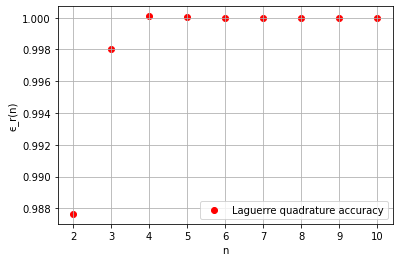

In [66]:

plt.scatter(n_i,puntos, label="Laguerre quadrature accuracy",color='red')
plt.xlabel("n")
plt.ylabel("ϵ_r(n)")
plt.legend()
plt.grid()
plt.show()

18

In [67]:
n=20
   
def GetHermite(n,x):
    
    y = sym.exp(-x**2)

    poly = ((-1)**n)*(sym.exp(x**2))*y.diff(x,n)
    
    return poly

GetHermite(n,x)



1048576*x**20 - 99614720*x**18 + 3810263040*x**16 - 76205260800*x**14 + 866834841600*x**12 - 5721109954560*x**10 + 21454162329600*x**8 - 42908324659200*x**6 + 40226554368000*x**4 - 13408851456000*x**2 + 670442572800

In [68]:
Hermite = []
DHermite = []

for i in range(n+1):
    
    Poly = GetHermite(i,x)
    Hermite.append(Poly)
    DHermite.append( sym.diff(Poly,x,1) )
    

In [70]:

def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

In [71]:
def GetRoots(f,df,x,tolerancia = 9):
    
    Roots = np.array([])
    
    for i in x:
        root = GetNewton(f,df,i)

        if root != False:
            
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [72]:
def GetAllRoots(n,xn,Hermite,DHermite):
    
    poly = sym.lambdify([x],Hermite[n],'numpy')
    Dpoly = sym.lambdify([x],DHermite[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    return Roots

In [73]:
xn = np.linspace(-10,10,100)
Roots = GetAllRoots(20,xn,Hermite,DHermite)        
print(Roots)
    

[-5.38748089 -4.60368245 -3.94476404 -3.34785457 -2.78880606 -2.254974
 -1.73853771 -1.23407621 -0.73747373 -0.24534071  0.24534071  0.73747373
  1.23407621  1.73853771  2.254974    2.78880606  3.34785457  3.94476404
  4.60368245  5.38748089]


In [74]:
def GetWeights(Roots,DHermite):

    Dpoly = sym.lambdify([x],Hermite[n-1],'numpy')
    pesos=[]
    
    for i in range(n):
        Weights=((2**(n-1))*(np.math.factorial(n))*(np.sqrt(np.pi)))/((n**2)*(Dpoly((Roots[i]))**2))
        pesos.append(Weights)
           
    return pesos
                                                            
                                                          

In [75]:
Weights = GetWeights(Roots,DHermite)
Weights


[2.229393646073966e-13,
 4.3993409558725894e-10,
 1.08606937275085e-07,
 7.802556518578926e-06,
 0.00022833863710672723,
 0.003243773344848253,
 0.024810520907577654,
 0.10901720623276515,
 0.2866755049783922,
 0.4622436697371077,
 0.4622436697371077,
 0.2866755049783922,
 0.10901720623276515,
 0.024810520907577654,
 0.003243773344848253,
 0.00022833863710672723,
 7.802556518578926e-06,
 1.08606937275085e-07,
 4.3993409558725894e-10,
 2.229393646073966e-13]

b)

In [76]:
suma=0
contador=0
funcion= lambda x:(x**4)
while contador<n:
    valor= Weights[contador]* funcion(Roots[contador])
    suma+=valor
    contador+=1

integral= 2*(1/np.pi)**(1/2)*suma
integral


1.500000001120142

19

a)

In [78]:

def bandas_(x,T,deltaT):
    T=T
    f1=np.sqrt((x**2)+ deltaT**2)
    f2= f1*300/(2*T)
    tan= np.tanh(f2)
    abajo= 2*np.sqrt((x**2)+deltaT**2)
    f= tan/abajo
    return f



b)

In [79]:
n=50
roots, weights = np.polynomial.legendre.leggauss(n)
roots, weights

(array([-0.9988664 , -0.99403197, -0.98535408, -0.97286439, -0.95661096,
        -0.93665662, -0.91307856, -0.88596798, -0.85542977, -0.82158207,
        -0.78455583, -0.7444943 , -0.70155247, -0.65589647, -0.60770293,
        -0.5571583 , -0.50445814, -0.44980633, -0.39341431, -0.33550025,
        -0.27628819, -0.21600724, -0.15489059, -0.0931747 , -0.03109834,
         0.03109834,  0.0931747 ,  0.15489059,  0.21600724,  0.27628819,
         0.33550025,  0.39341431,  0.44980633,  0.50445814,  0.5571583 ,
         0.60770293,  0.65589647,  0.70155247,  0.7444943 ,  0.78455583,
         0.82158207,  0.85542977,  0.88596798,  0.91307856,  0.93665662,
         0.95661096,  0.97286439,  0.98535408,  0.99403197,  0.9988664 ]),
 array([0.00290862, 0.0067598 , 0.01059055, 0.01438082, 0.01811556,
        0.02178024, 0.02536067, 0.02884299, 0.03221373, 0.03545984,
        0.03856876, 0.04152846, 0.0443275 , 0.04695505, 0.04940094,
        0.0516557 , 0.05371062, 0.05555774, 0.05718993, 0.058600

c)

In [81]:
dt=1
a=-1
b=1
temp=0

while dt<(20+1e-4):
    
    _integral=np.sum(weights*bandas_(roots,dt,0))
    result=1/0.3
    
    
    if np.abs(_integral-(1/0.3))< 1e-4:
        temp=dt
        break
    
    dt+=1e-4   

temp
    

12.133599999985154